# Image Processing with Python: Blob Detection using LoG, DoG, and DoH

by: Jephraim C. Manansala | Published on https://jephraim-manansala.medium.com/

### How can we detect the object of interest in our images?

In this post, we will explore how to automatically detect blobs in an image using the LoG, DoG, and DoH methods. This can be particularly useful when counting multiple repeating objects in an image.

Let’s begin.

As usual, we import libraries such as `numpy`, and `matplotlib`. Additionally, we import specific functions from the `skimage` library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.feature import blob_dog, blob_log, blob_doh
import warnings 
warnings.filterwarnings('ignore')

But first, what is a blob? A **blob** is an object of interest within an image. They can be characterized as a bright object in an image with a dark background or vice versa. With this, we can define **blob detection** as a method to find objects in an image characterized by a specific property. There are three methods that can be used to detect blobs. They are:

1. **Laplacian of Gaussian (LoG)**, which takes the Laplacian of a Gaussian smoothed image
2. **Difference of Gaussian (DoG)**, which takes the difference of two Gaussian smoothed images
3. **Determinant of Hessian (DoH)**, which takes the maximum value in the matrix of the determinant of Hessian

The definition of these methods might seem difficult to understand — *and it actually is!* But we will not delve deeper into the mathematics and programming of these methods. Instead, we will explore how these methods perform on an actual image.

Again, we will be using an image of the sponge gourd vines — *similar to my previous post.* If you can remember, we have applied morphological operations to clean and preprocess the binarized image. The resulting image is a mask with a value of 1 for the pixels containing the dried leaves and a value of 0 for the rest of the image.

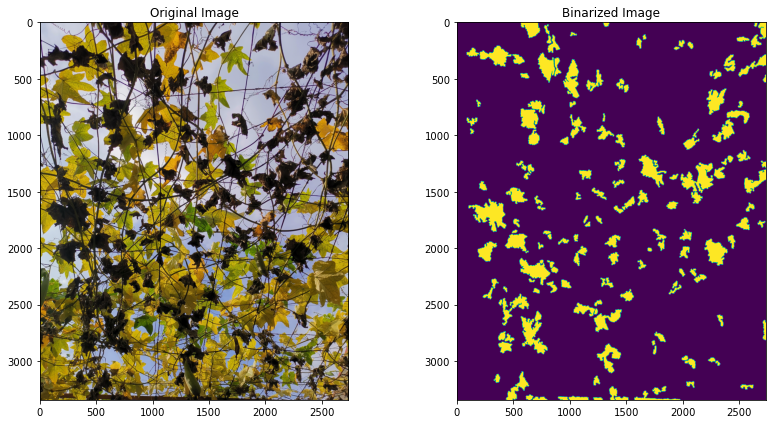

In [2]:
leaves = imread('leaves.jpg')
leaves_mask = imread('leaves_mask.jpg')

fig, axis = plt.subplots(1,2, figsize=(12,6))
axis[0].imshow(leaves);
axis[0].set_title('Original Image')

axis[1].imshow(leaves_mask)
axis[1].set_title('Binarized Image')
plt.tight_layout()

Now, you might ask, why do we need to use a cleaned and binarized image to perform blob detection? Could we use the original image? The answer is YES; we can use the original and unprocessed image — however, remember what our definition of a blob is.

> A blob is a bright object in an image with a dark background or vice versa.

Suppose we use the original and unprocessed image. In that case, the algorithm might have a hard time identifying the “bright object” in the “dark background” because there are varying intensity levels in each pixel. This will result in an inaccurate and sluggish blob detection — *which we do not want!* This is the reason why we opted to use a binarized image for blob detections.

Now, let’s try to use the Laplacian of Gaussian (LoG) on this binarized image. We will be only setting the `min_sigma` parameter on all methods. The rest will be the default parameter setting.

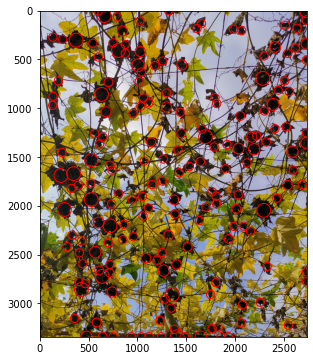

In [3]:
blobs = blob_log(leaves_mask, min_sigma=30)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(leaves)
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), 
                 color='r', fill=False))

Notice how this method detected the blobs of dried leaves in the image — especially the smaller leaves. However, we can notice that when the leaves are large, elongated, or irregular shaped, the algorithm tends to splits the object into two or more blobs.

Let’s try to use the Difference of Gaussian (DoG) next.

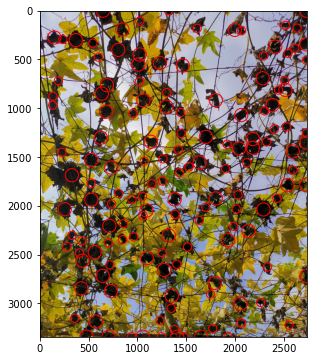

In [4]:
blobs = blob_dog(leaves_mask, min_sigma=30)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(leaves)
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), 
                 color='r', fill=False))

We can see how this method improved the blob detection from the LoG. Notice how we can detect large-sized objects using a single larger blob size rather than using multiple smaller blobs. However, the method still cannot consider elongated objects as a single blob.

Lastly, let’s try to use the Determinant of Hessian (DoH).

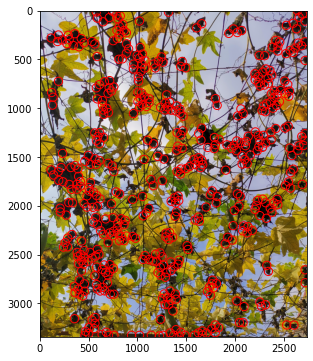

In [5]:
blobs = blob_doh(leaves_mask, min_sigma=30)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(leaves)
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), 
                 color='r', fill=False))

The Determinant of Hessian did a poor job in detecting blobs in this specific application. However, by inspecting the blobs detected by the method, we can see that this method identifies the object’s edges as the blob rather than the body of the object. This can be particularly useful in other applications wherein detecting the edges of the object is essential.

To conclude, all of these methods has its strengths and weakness. But the one thing that all of these algorithms have in common is that their underlying assumption is that **blobs are circular**. However, it is quite obvious that most of the time, the blobs that we will be working with are irregularly shaped. In these cases, other techniques can be used to identify and label objects in an image properly. An example of which is the connected components, which will be the topic of my succeeding post.

#### In summary

We have explored how different the blob detection methods — such as the Laplacian of Gaussian (LoG), Difference of Gaussian (DoG), and Determinant of Hessian (DoH) — can be used to detect, label, and measure objects in our image. We have also tackled the importance of preprocessing the image before conducting such blob detection methods.

Now, it should be noted that specific applications will require specific blob detection methods, and it is upon the discretion of the data scientist to choose the proper techniques. With this, I hope the findings raised in this blog can help you select the most appropriate blob detection method in your projects.